In [55]:
import pandas as pd

# Load the dataset
fiche_a ='/content/drive/MyDrive/Colab Notebooks/company.csv'
df = pd.read_csv(fiche_a)



In [56]:
import numpy as np

# Handle missing values
df.fillna({
    'department': 'Unknown',
    'salary': '0',
    'years_at_company': '0',
    'age': df['age'].median(),
    'job_satisfaction': df['job_satisfaction'].median(),
    'performance_score': df['performance_score'].median(),
    'last_promotion_year': df['last_promotion_year'].mode()[0],
    'education_level': 'Unknown',
    'gender': 'Unknown',
    'hired_date': '01-01-1970'
}, inplace=True)

# Standardize the salary column
df['salary'] = df['salary'].replace('[\$,K]', '', regex=True).astype(float)*1000

# Transform gender to 'M' if 'Male' and 'F' if 'Female'
df['gender'] = df['gender'].replace({'Male': 'M', 'Female': 'F'})

# Standardize the years_at_company column
df['years_at_company'] = df['years_at_company'].replace({'years': '', ' ': ''}, regex=True).astype(float)

# Convert hired_date to datetime
df['hired_date'] = pd.to_datetime(df['hired_date'], errors='coerce', dayfirst=True)

# Convert last_promotion_year to datetime and extract the year
df['last_promotion_year'] = pd.to_datetime(df['last_promotion_year'], format='%Y').dt.year

# Convert age to integer
df['age'] = df['age'].astype(int)

# Verify the transformations
df.info()

# Display the cleaned data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   employee_id          47 non-null     int64         
 1   department           47 non-null     object        
 2   salary               47 non-null     float64       
 3   years_at_company     47 non-null     float64       
 4   age                  47 non-null     int64         
 5   job_satisfaction     47 non-null     int64         
 6   performance_score    47 non-null     int64         
 7   last_promotion_year  47 non-null     int32         
 8   education_level      47 non-null     object        
 9   gender               47 non-null     object        
 10  hired_date           4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(1), int64(4), object(3)
memory usage: 4.0+ KB


,employee_id,department,salary,years_at_company,age,job_satisfaction,performance_score,last_promotion_year,education_level,gender,hired_date
0,1,Sales,60000000.0,5.0,30,7,85,2018,Bachelor,M,2015-06-15
1,2,Engineering,95000.0,8.0,35,8,90,2017,Master,F,NaT
2,3,HR,45000.0,2.0,28,6,70,2020,Bachelor,F,2019-04-23
3,4,Marketing,75000.0,10.0,40,9,95,2015,Master,M,NaT
4,5,IT,50000000.0,3.0,25,5,60,2011,Bachelor,M,NaT


In [ ]:

# Repatisyon chak anplwaye nan chak depatman
department_distribution = df['department'].value_counts().reset_index()
department_distribution.columns = ['department', 'count']

# Repatisyon pa sèks nan chak depatman
gender_distribution_per_department = df.groupby('department')['gender'].value_counts().unstack().fillna(0).reset_index()

# Mwayèn laj anplwaye yo pou chak depatman
average_age_per_department = df.groupby('department')['age'].mean().reset_index()
average_age_per_department.columns = ['department', 'average_age']

# Display results
print(department_distribution)
print(gender_distribution_per_department)
print(average_age_per_department)


    department  count
0           IT     11
1        Sales      9
2  Engineering      9
3           HR      9
4    Marketing      9
gender   department  F  M
0       Engineering  3  6
1                HR  8  1
2                IT  4  7
3         Marketing  4  5
4             Sales  2  7
    department  average_age
0  Engineering    32.777778
1           HR    25.444444
2           IT    26.090909
3    Marketing    38.000000
4        Sales    29.444444


In [ ]:
# Save results to CSV for further use
department_distribution.to_csv('/content/drive/MyDrive/Colab Notebooks/department_distribution.csv', index=False)
gender_distribution_per_department.to_csv('//content/drive/MyDrive/Colab Notebooks/gender_distribution_per_department.csv', index=False)
average_age_per_department.to_csv('/content/drive/MyDrive/Colab Notebooks/average_age_per_department.csv', index=False)

<ipython-input-28-7e02b247786a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='count', data=department_distribution, palette='viridis')


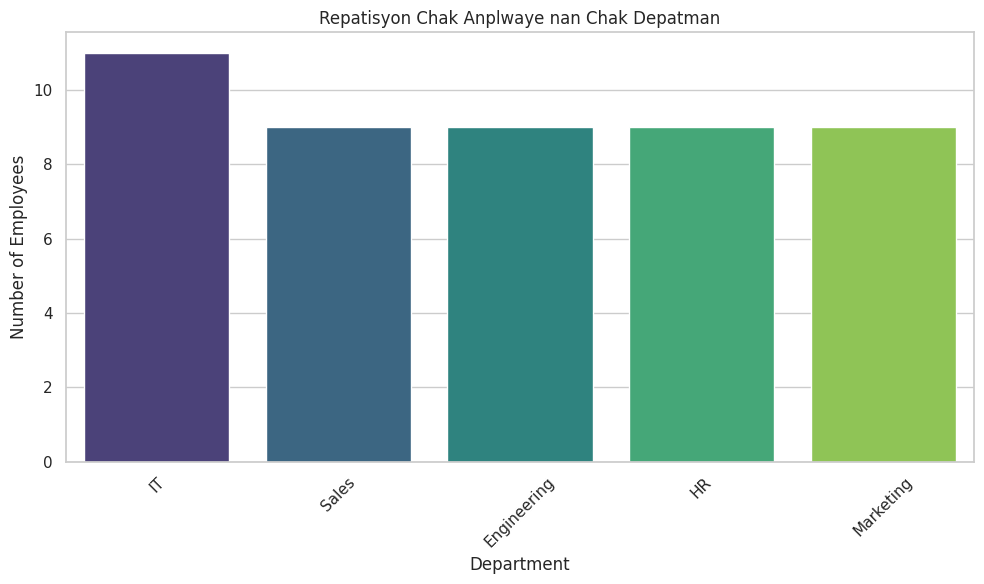

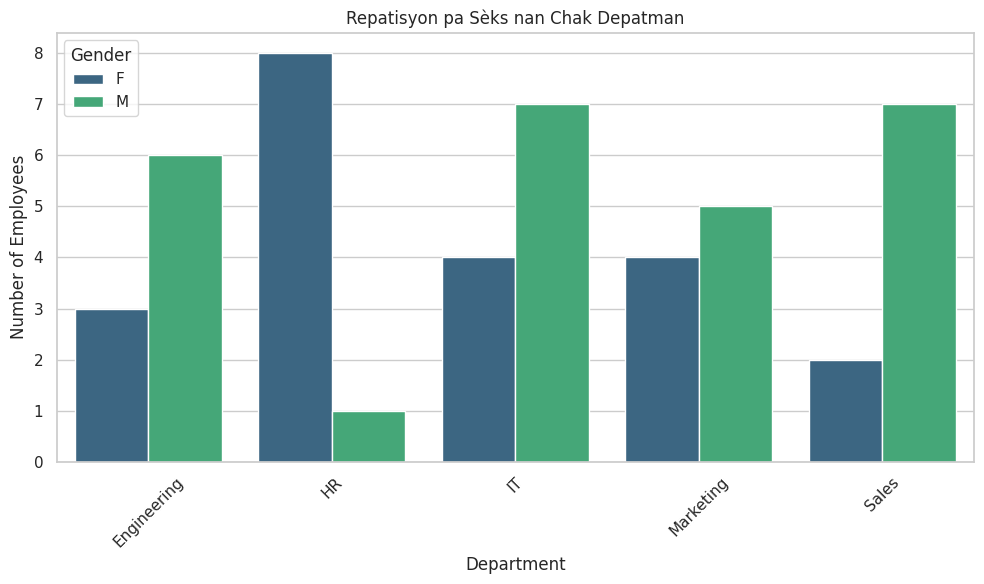

<ipython-input-28-7e02b247786a>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='average_age', data=average_age_per_department, palette='viridis')


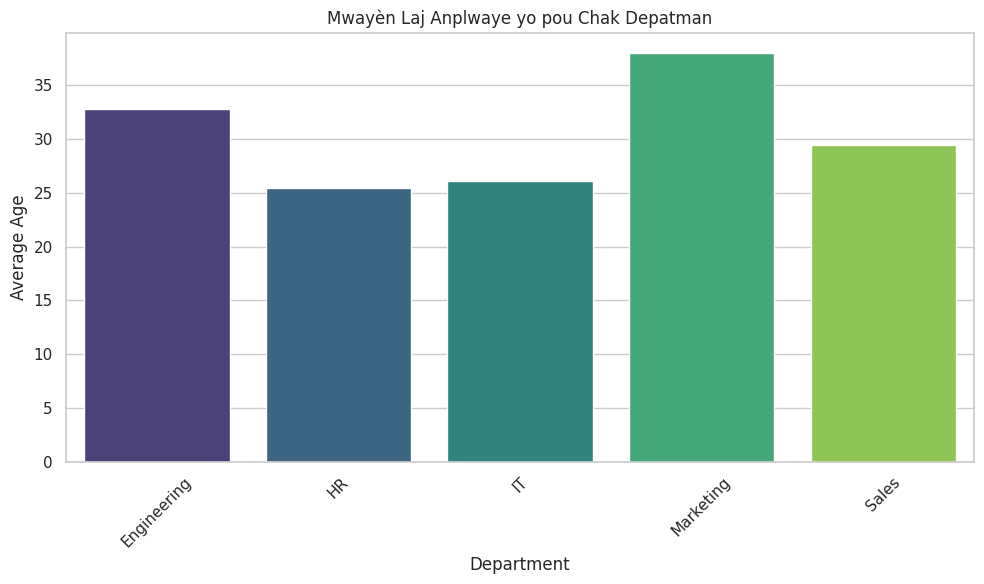

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Plot settings
sns.set(style="whitegrid")

# Repatisyon chak anplwaye nan chak depatman
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='count', data=department_distribution, palette='viridis')
plt.title('Repatisyon Chak Anplwaye nan Chak Depatman')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Repatisyon pa sèks nan chak depatman
gender_distribution_melted = gender_distribution_per_department.melt(id_vars='department', value_vars=['F', 'M'], var_name='gender', value_name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='count', hue='gender', data=gender_distribution_melted, palette='viridis')
plt.title('Repatisyon pa Sèks nan Chak Depatman')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Mwayèn laj anplwaye yo pou chak depatman
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='average_age', data=average_age_per_department, palette='viridis')
plt.title('Mwayèn Laj Anplwaye yo pou Chak Depatman')
plt.xlabel('Department')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-30-c2ce14052c5f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='average_salary', data=average_salary_per_department, palette='viridis')


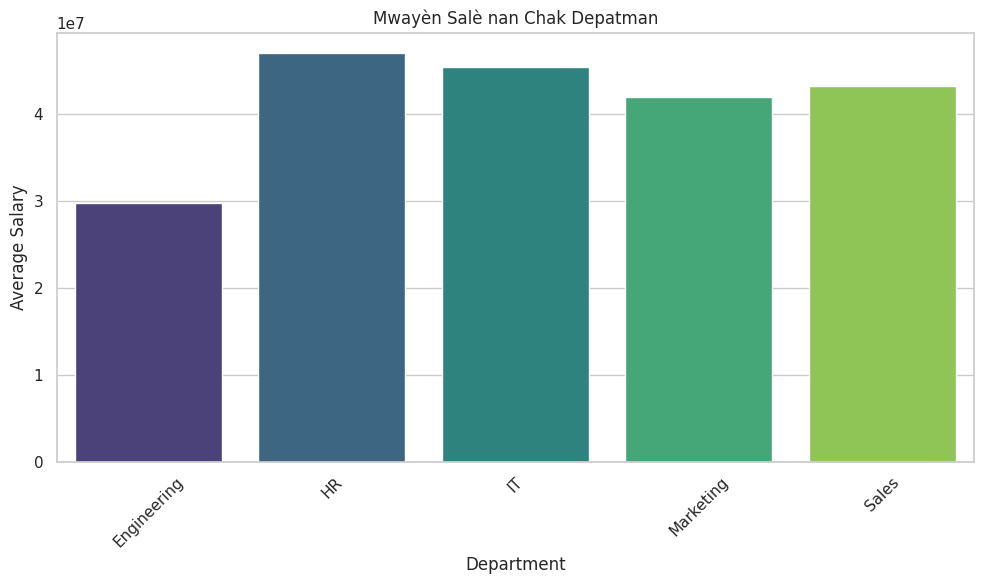

<ipython-input-30-c2ce14052c5f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='average_job_satisfaction', data=job_satisfaction_per_department, palette='viridis')


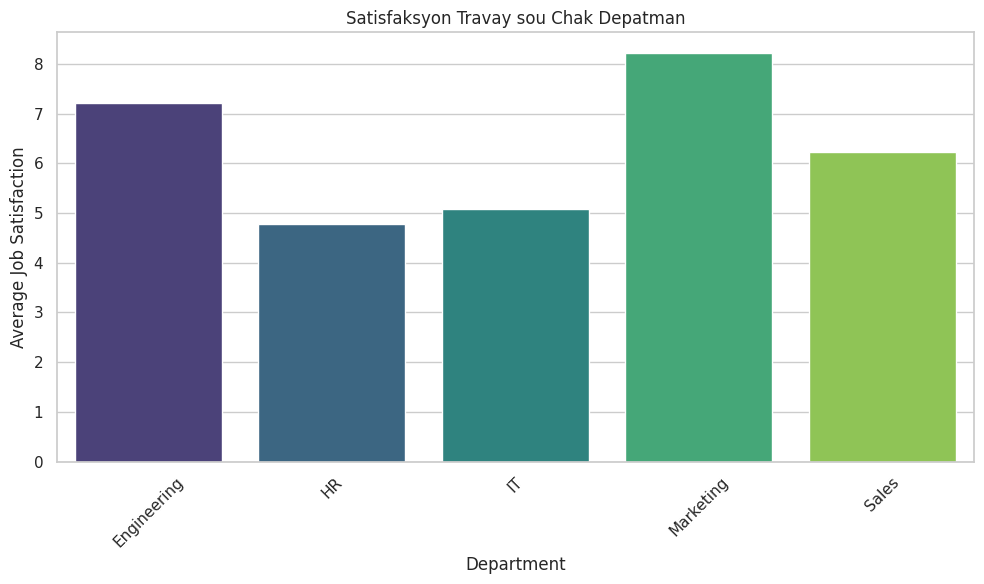

In [ ]:
# Calculate the average salary and job satisfaction per department

# Mwayèn salè nan chak depatman
average_salary_per_department = df.groupby('department')['salary'].mean().reset_index()
average_salary_per_department.columns = ['department', 'average_salary']

# Satisfaksyon travay sou chak depatman
job_satisfaction_per_department = df.groupby('department')['job_satisfaction'].mean().reset_index()
job_satisfaction_per_department.columns = ['department', 'average_job_satisfaction']

# Plot Mwayèn salè nan chak depatman
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='average_salary', data=average_salary_per_department, palette='viridis')
plt.title('Mwayèn Salè nan Chak Depatman')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Satisfaksyon travay sou chak depatman
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='average_job_satisfaction', data=job_satisfaction_per_department, palette='viridis')
plt.title('Satisfaksyon Travay sou Chak Depatman')
plt.xlabel('Department')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-31-9d4d6718188b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='average_years_since_last_promotion', data=average_years_since_promotion_per_department, palette='viridis')


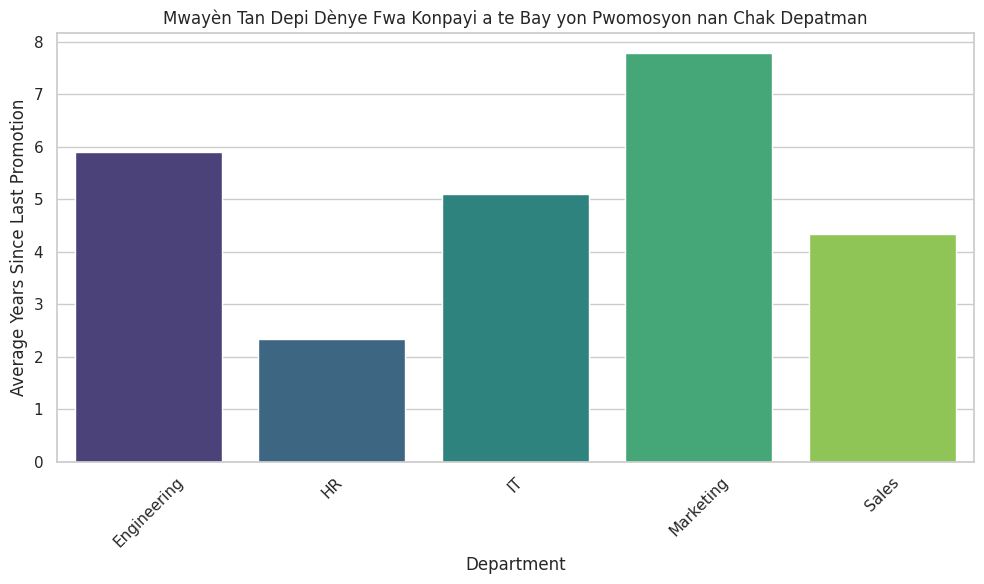

<ipython-input-31-9d4d6718188b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='education_level', y='average_salary', data=average_salary_per_education_level, palette='viridis')


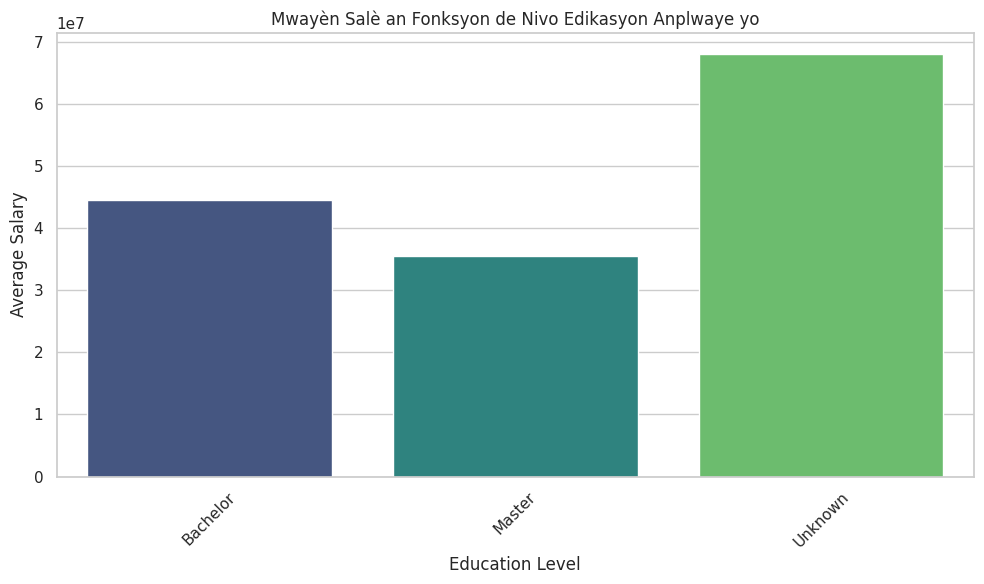

(    department  average_years_since_last_promotion
 0  Engineering                            5.888889
 1           HR                            2.333333
 2           IT                            5.090909
 3    Marketing                            7.777778
 4        Sales                            4.333333,
   education_level  average_salary
 0        Bachelor      44574000.0
 1          Master      35423050.0
 2         Unknown      68000000.0)

In [ ]:
# Calculate the average time since last promotion per department
current_year = pd.to_datetime('now').year
df['years_since_last_promotion'] = current_year - df['last_promotion_year']
average_years_since_promotion_per_department = df.groupby('department')['years_since_last_promotion'].mean().reset_index()
average_years_since_promotion_per_department.columns = ['department', 'average_years_since_last_promotion']

# Calculate the average salary based on education level
average_salary_per_education_level = df.groupby('education_level')['salary'].mean().reset_index()
average_salary_per_education_level.columns = ['education_level', 'average_salary']

# Plot the average time since last promotion per department
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='average_years_since_last_promotion', data=average_years_since_promotion_per_department, palette='viridis')
plt.title('Mwayèn Tan Depi Dènye Fwa Konpayi a te Bay yon Pwomosyon nan Chak Depatman')
plt.xlabel('Department')
plt.ylabel('Average Years Since Last Promotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the average salary based on education level
plt.figure(figsize=(10, 6))
sns.barplot(x='education_level', y='average_salary', data=average_salary_per_education_level, palette='viridis')
plt.title('Mwayèn Salè an Fonksyon de Nivo Edikasyon Anplwaye yo')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

average_years_since_promotion_per_department, average_salary_per_education_level
